In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats  import ttest_ind
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr
import seaborn as sns
import math
from scipy.stats import mannwhitneyu

In [3]:
# Loading the cleaned data

stats_project = pd.read_csv(r"C:\Users\dulce\OneDrive\Documentos\Ironhack git\Ironhack\Projects\Week 6 Project\Statistics Project\new_dataframe.csv")

stats_project

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
95,Patricia Campos,27,Female,3,18,89,2.6,HR,Junior Developer,Jan-18,54974
96,Amy Carr,51,Female,24,75,37,4.9,Finance,Manager,Jan-08,114384
97,Renee Jones,50,Female,16,54,93,3.0,IT,Team Lead,Jan-07,101416
98,Cheryl Spencer,29,Male,7,38,29,1.3,Finance,Analyst,Jan-18,62588


In [6]:
stats_project.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,34.370000,11.380000,42.770000,49.350000,2.819000,76319.530000
std,9.705413,6.564028,27.977933,29.216494,1.115338,25999.038552
min,22.000000,0.000000,0.000000,0.000000,1.100000,30509.000000
25%,26.000000,5.000000,18.000000,23.750000,1.875000,51920.500000
50%,31.500000,11.000000,40.500000,50.500000,2.800000,80397.500000
75%,41.000000,16.000000,63.500000,73.500000,3.825000,100738.000000
max,59.000000,25.000000,96.000000,100.000000,4.900000,119895.000000


**Hypothesis 1:** Gender and Salary Inequality

H0: There is no gender-based salary inequality.

H1: There is gender-based salary inequality.

In this hypothesis, you're examining whether there's a significant salary difference between genders. This is a crucial topic to investigate, 
as it relates to potential pay disparities based on gender.

In [8]:
import pandas as pd
from scipy import stats

# Doing T-Test to understand if there is a gender-based salary inequality

male_salaries = stats_project[stats_project['Gender'] == 'Male']['Salary']
female_salaries = stats_project[stats_project['Gender'] == 'Female']['Salary']

t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries)

alpha = 0.05 


print('t_statistic:', t_statistic)
print('P_value:', p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is gender-based salary inequality.")
else:
    print("Fail to reject the null hypothesis. There is no gender-based salary inequality.")


t_statistic: 0.34479504517358317
P_value: 0.730987330219824
Fail to reject the null hypothesis. There is no gender-based salary inequality.


**Hypothesis 2:** 

H0: There is no relationship between salary and the number of projects completed.

H1: Salary is related to the number of projects completed.

Pearson Correlation Coefficient: 0.8769767943096125
p-value: 5.8855593159793945e-33
Reject the null hypothesis. There is a significant relationship between Salary and Number of Projects Completed.


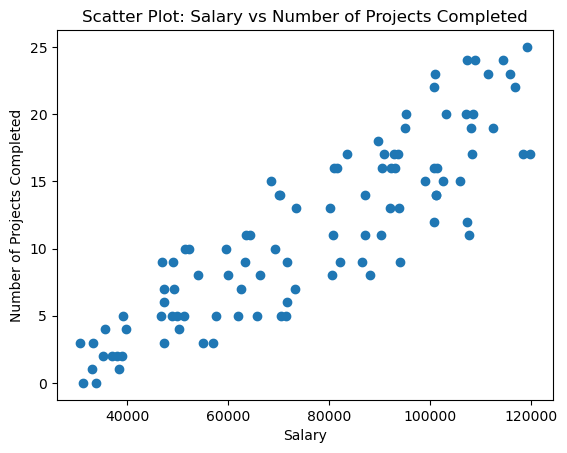

In [69]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Doing the Pearson Correlation for salaries and the number of projects completed

corr_coeff, p_value = pearsonr(stats_project['Salary'], stats_project['Projects Completed'])
print(f'Pearson Correlation Coefficient: {corr_coeff}')
print(f'p-value: {p_value}')

alpha = 0.05  
if p_value <= alpha:
    print('Reject the null hypothesis. There is a significant relationship between Salary and Number of Projects Completed.')
else:
    print('Fail to reject the null hypothesis. There is no significant relationship between Salary and Number of Projects Completed.')

plt.scatter(stats_project['Salary'], stats_project['Projects Completed'])
plt.xlabel('Salary')
plt.ylabel('Number of Projects Completed')
plt.title('Scatter Plot: Salary vs Number of Projects Completed')
plt.show()

**Hypothesis 3:**

H0: There is no consistent trend in productivity across different age groups.

H1: There is no consistent trend in productivity across different age groups.

ANOVA F-statistic: 0.36522411801362703
P-value: 0.7782543468712488
Fail to reject null hypothesis: There is no consistent trend in productivity across different age groups.


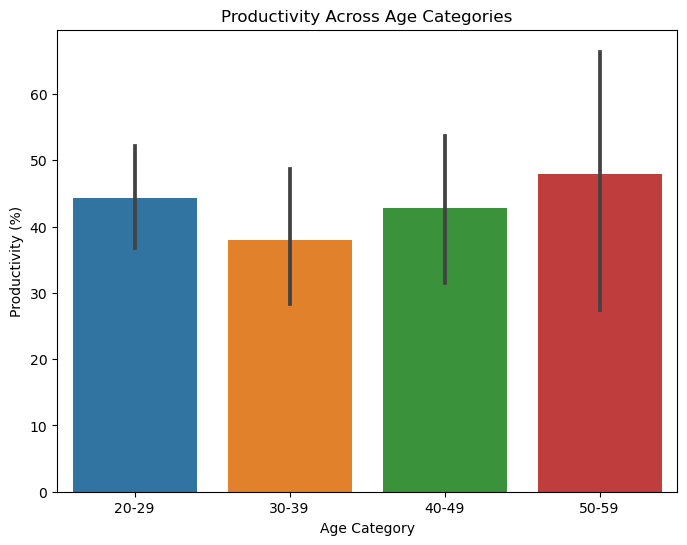

In [11]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Doing the ANOVA TEST for productivity across age categories


age_groups = stats_project['Age']
productivity = stats_project['Productivity (%)']

# Use pandas' cut function to create age groups
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50-59']
age_categories = pd.cut(age_groups, bins=age_bins, labels=age_labels)

# Add the age categories to the DataFrame
stats_project['Age Category'] = age_categories

# Perform ANOVA
anova_result = stats.f_oneway(*[group['Productivity (%)'] for name, group in stats_project.groupby('Age Category')])

alpha = 0.05  # Significance level

print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

if anova_result.pvalue < alpha:
    print("Reject null hypothesis: There is a consistent trend in productivity across different age groups.")
else:
    print("Fail to reject null hypothesis: There is no consistent trend in productivity across different age groups.")

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Category', y='Productivity (%)', data=stats_project)
plt.xlabel('Age Category')
plt.ylabel('Productivity (%)')
plt.title('Productivity Across Age Categories')
plt.show()


Hypothesis 4:

H0: Salary has no effect on employee satisfaction.

H1: Salary is linked to employee satisfaction.

This hypothesis investigates whether there's a connection between employee satisfaction levels and their salaries. 
Understanding this relationship can provide insights into the role of compensation in overall job contentment.

In [91]:
import pandas as pd
import scipy.stats as stats

salary = stats_project['Salary']
satisfaction = stats_project['Satisfaction Rate (%)']

# Calculating Pearson's correlation coefficient and p-value
correlation, p_value = stats.pearsonr(salary, satisfaction)

print(f"Pearson's Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.6f}")

# Significance level
alpha = 0.05 

if p_value < alpha:
    print("Reject null hypothesis: There is a significant link between salary and employee satisfaction.")
else:
    print("Fail to reject null hypothesis: There is no significant link between salary and employee satisfaction.")

Pearson's Correlation Coefficient: 0.04
P-value: 0.675442
Fail to reject null hypothesis: There is no significant link between salary and employee satisfaction.


Pearson's Correlation Coefficient: 0.04238315569110033
P-value: 0.6754418513001278
Fail to reject null hypothesis: There is no correlation between salary and employee satisfaction.


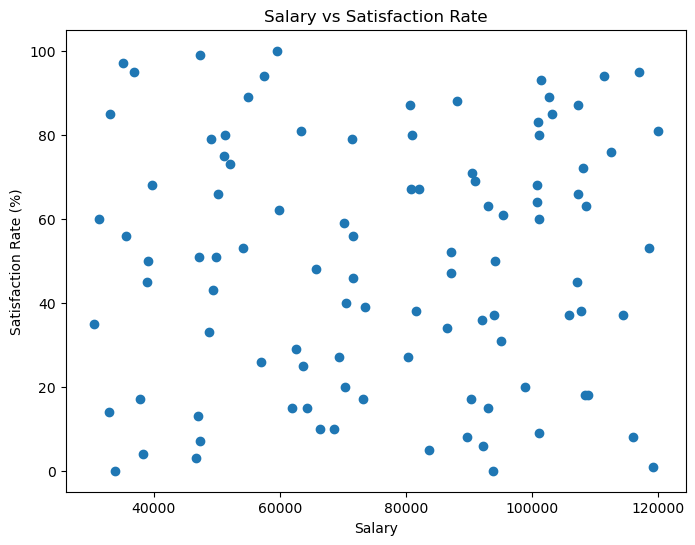

In [107]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


salary = stats_project['Salary']
satisfaction = stats_project['Satisfaction Rate (%)']

correlation, p_value = stats.pearsonr(salary, satisfaction)

print(f"Pearson's Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

alpha = 0.05 

if p_value < alpha:
    print("Reject null hypothesis: There is a significant link between salary and employee satisfaction.")
else:
    print("Fail to reject null hypothesis: There is no correlation between salary and employee satisfaction.")

plt.figure(figsize=(8, 6))
plt.scatter(salary, satisfaction)
plt.xlabel('Salary')
plt.ylabel('Satisfaction Rate (%)')
plt.title('Salary vs Satisfaction Rate')
plt.show()